In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud_data.csv


In [2]:
# Load dataset into DataFrame and identify columns for missing rows and consistent data types
df = pd.read_csv('/kaggle/input/fraud_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [3]:
# Inspect the outputs of the DataFrame
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [4]:
df['transaction_time'] = pd.to_datetime(df['trans_date_trans_time'], unit='ns').dt.time
df['transaction_weekday'] = pd.to_datetime(df['trans_date_trans_time'], unit='ns').dt.weekday
df['transaction_day'] = pd.to_datetime(df['trans_date_trans_time'], unit='ns').dt.day
df['transaction_month'] = pd.to_datetime(df['trans_date_trans_time'], unit='ns').dt.month

df['dob'] = df['dob'].str[-4:]

df['city_state'] = df['city'] + ", " + df['state']

df['is_fraud'] = df['is_fraud'].str[0].astype('int64')

# df = df.drop(['trans_date_trans_time', 'lat', 'long', 'trans_num', 'merch_lat', 'merch_long'], axis=1)

df = df.drop(['trans_date_trans_time', 'lat', 'long', 'trans_num', 'merch_lat', 'merch_long', 'city', 'state'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   merchant             14446 non-null  object 
 1   category             14446 non-null  object 
 2   amt                  14446 non-null  float64
 3   city_pop             14446 non-null  int64  
 4   job                  14446 non-null  object 
 5   dob                  14446 non-null  object 
 6   is_fraud             14446 non-null  int64  
 7   transaction_time     14446 non-null  object 
 8   transaction_weekday  14446 non-null  int32  
 9   transaction_day      14446 non-null  int32  
 10  transaction_month    14446 non-null  int32  
 11  city_state           14446 non-null  object 
dtypes: float64(1), int32(3), int64(2), object(6)
memory usage: 1.2+ MB


In [5]:
columns = df.columns

for index, column in enumerate(columns):
    print(f'{df[column].value_counts(normalize=True)*100}\n')

merchant
Kilback LLC                     0.401495
Cormier LLC                     0.332272
Kutch and Sons                  0.318427
Rau and Sons                    0.304583
McDermott-Weimann               0.290738
                                  ...   
Collier Inc                     0.027689
Wiegand-Lowe                    0.027689
"Ferry, Reichel and DuBuque"    0.027689
Jerde-Hermann                   0.027689
Kovacek Lt                      0.020767
Name: proportion, Length: 693, dtype: float64

category
grocery_pos       11.089575
gas_transport      9.898934
shopping_net       9.746643
shopping_pos       9.372837
home               9.026720
kids_pets          7.898380
personal_care      6.853108
entertainment      6.596982
health_fitness     6.167797
food_dining        6.022428
misc_pos           5.697079
misc_net           5.683234
grocery_net        3.281185
travel             2.665098
Name: proportion, dtype: float64

amt
1.64       0.076146
5.24       0.076146
2.77       0.0

In [6]:
# Drop unneeded columns or features and separate define the target
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

X.head()

,merchant,category,amt,city_pop,job,dob,transaction_time,transaction_weekday,transaction_day,transaction_month,city_state
0,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,145,"""Administrator, education""",1939,00:58:00,0,1,4,"Wales, AK"
1,Predovic Inc,shopping_net,966.11,145,"""Administrator, education""",1939,15:06:00,0,1,4,"Wales, AK"
2,Wisozk and Sons,misc_pos,49.61,145,"""Administrator, education""",1939,22:37:00,0,1,4,"Wales, AK"
3,Murray-Smitham,grocery_pos,295.26,145,"""Administrator, education""",1939,23:06:00,0,1,4,"Wales, AK"
4,Friesen Lt,health_fitness,18.17,145,"""Administrator, education""",1939,23:59:00,0,1,4,"Wales, AK"


In [7]:
! pip install feature_engine
# ! pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 7.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 75.0 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [8]:
X_dob_column = X[['dob']].columns.tolist()
X_amt_column = X[['amt']].columns.tolist()
X_dat_columns = X.select_dtypes(include=['int32']).columns.tolist()
X_num_columns = X.drop(['amt'], axis=1).select_dtypes(include=['int64','float64']).columns.tolist()
X_cat_columns = X.drop(['dob'], axis=1).select_dtypes(include=['object']).columns.tolist()

numerical_features   = X_num_columns
categorical_features = X_cat_columns 
financial_features   = X_amt_column
datetime_features    = X_dat_columns + X_dob_column

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from feature_engine.encoding import CountFrequencyEncoder
# from category_encoders.rankhot import RankHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


numerical_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy='median', fill_value='missing')), 
        ("scaler",  StandardScaler())
    ])

categorical_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy='most_frequent', fill_value='missing')), 
        ("encoder", CountFrequencyEncoder(encoding_method='frequency'))
    ])

financial_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy='median', fill_value='missing')), 
        ("scaler",  PowerTransformer())
    ])

datetime_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy='most_frequent', fill_value='missing')), 
        ("scaler",  MinMaxScaler())
    ])

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numerical_transformer,   numerical_features),
        ("cat", categorical_transformer, categorical_features),
        ("fin", financial_transformer,   financial_features),
        ("dat", datetime_transformer,    datetime_features)
    ])


X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

/opt/conda/lib/python3.10/site-packages/feature_engine/encoding/base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) x3.
  warnings.warn(


In [11]:
# X = df.drop(['is_fraud'], axis=1)

# X_transform = preprocessor.transform(X)

# X_df = pd.DataFrame(data=X_transform, columns=X.columns)

# X_index = X_df[X_df.job.isnull()==True]

# X_index

In [12]:
X_train_scaled_df = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

X_train_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   merchant             10112 non-null  float64
 1   category             10112 non-null  float64
 2   amt                  10112 non-null  float64
 3   city_pop             10112 non-null  float64
 4   job                  10112 non-null  float64
 5   dob                  10112 non-null  float64
 6   transaction_time     10112 non-null  float64
 7   transaction_weekday  10112 non-null  float64
 8   transaction_day      10112 non-null  float64
 9   transaction_month    10112 non-null  float64
 10  city_state           10112 non-null  float64
dtypes: float64(11)
memory usage: 869.1 KB


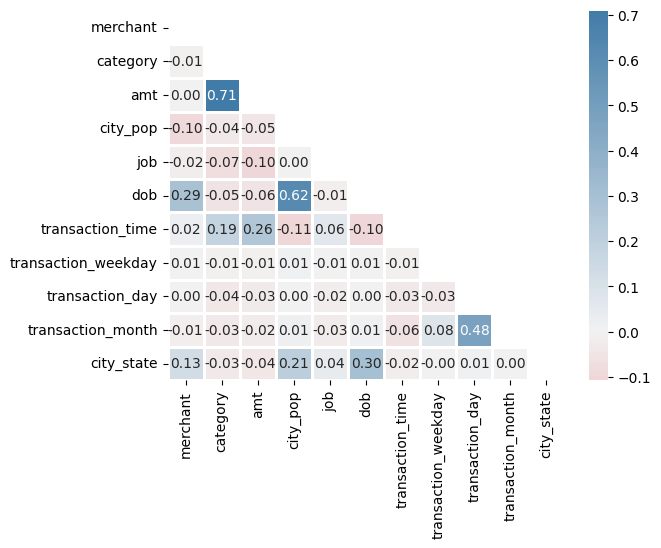

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df = X_train_scaled_df.corr()

mask = np.triu(np.ones_like(corr_df, dtype=bool))

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

sns.heatmap(data=corr_df.mask(mask), center=0, cmap=cmap, linewidths=1, annot=True, fmt='.2f')

plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

estimator = DecisionTreeClassifier(random_state=123)

rfe = RFE(estimator, n_features_to_select=10, step=1)

rfe = rfe.fit(X_train_scaled_df, y_train)

print(dict(zip(rfe.get_feature_names_out(), rfe.ranking_)))

print(accuracy_score(y_test, rfe.predict(X_test_scaled)))

{'merchant': 1, 'amt': 2, 'city_pop': 1, 'job': 1, 'dob': 1, 'transaction_time': 1, 'transaction_weekday': 1, 'transaction_day': 1, 'transaction_month': 1, 'city_state': 1}
0.9919243193354869


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


In [15]:
X_train_scaled_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_scaled_rfe = rfe.transform(X_test_scaled)

estimator.fit(X_train_scaled_rfe, y_train)

print(dict(zip(X_train_scaled_df.columns, estimator.feature_importances_)))

{'merchant': 0.009914387602416835, 'category': 0.013740757521888679, 'amt': 0.031626565216595535, 'city_pop': 0.005087501936185748, 'job': 0.0063959881442301235, 'dob': 0.5604001699578127, 'transaction_time': 0.0037453168184319228, 'transaction_weekday': 0.1523659488871015, 'transaction_day': 0.2014892657213767, 'transaction_month': 0.015234098193960398}


In [16]:
score = estimator.score(X_test_scaled_rfe, y_test)

print(score)

0.9919243193354869


In [17]:
from sklearn.feature_selection import RFECV

np.random.seed(1)    

rfecv = RFECV(estimator, step=1, cv=10)

rfecv = rfecv.fit(X_train_scaled_df, y_train)

X_train_scaled_df.columns[rfecv.support_]

Index(['merchant', 'amt', 'city_pop', 'transaction_time', 'transaction_day',
       'transaction_month', 'city_state'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


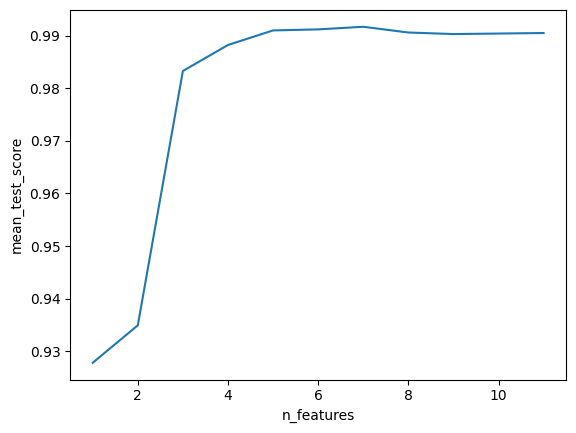

In [18]:
rfecv_results = pd.DataFrame(rfecv.cv_results_)

pd.option_context('mode.use_inf_as_na', True)

sns.lineplot(x='n_features' , y='mean_test_score' , data=rfecv_results)

plt.show()

In [19]:
from sklearn.feature_selection import SelectKBest, chi2

X_df = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

X = preprocessor.fit_transform(X_df)
X = pd.DataFrame(data=X, columns=X_df.columns)
X = X.drop(['transaction_time'], axis=1)
X['merchant'] = np.abs(X['merchant'])

skb = SelectKBest(chi2, k=7)

skb.fit_transform(X, y)

X.columns[skb.get_support()]

Index(['merchant', 'amt', 'city_pop', 'dob', 'transaction_day',
       'transaction_month', 'city_state'],
      dtype='object')

In [20]:
from sklearn.model_selection import StratifiedKFold

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []

# X_train_scaled_rfe_df = pd.DataFrame(data=X_train_scaled_rfe, columns=X_train_scaled_df.drop('transaction_time', axis=1).columns)

# X = X_train_scaled_rfe
# y = y[X_train_scaled_rfe_df.index]

# X_train_scaled_df = pd.DataFrame(data=X_train_scaled_df, columns=X_train_scaled_df.drop('transaction_time', axis=1).columns)

# X = X_train_scaled
# y = y[X_train_scaled_df.index]

X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

X = preprocessor.transform(X)

# Perform stratified k-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train a classifier (e.g., Logistic Regression)
    classifier = DecisionTreeClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate and store the accuracy score for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the mean and standard deviation of accuracy scores
mean_accuracy = sum(accuracy_scores) / 5
std_deviation = (sum((x - mean_accuracy) ** 2 for x in accuracy_scores) / (5 - 1)) ** 0.5

print(accuracy_scores)
print(mean_accuracy)
print(std_deviation)

[0.9719723183391004, 0.9743856005538248, 0.995846313603323, 0.9927310488058152, 0.9941156109380408]
0.9858101784480209
0.011614753728187396
